
# Description

In this challenge, you will be given a set of circles, defined by their centers and radii.  Your goal is to find the bounding rectangle which will contain all of the circles completely.

Write a program that determines the vertices of the bounding rectangle with sides parallel to the axes.

# Input Description 

Each line will contain a comma separated center and radius for a circle.

# Output Description 

The format of the output will be comma separated coordinates, rounded to 3 decimal places.

# Challenge Input

	1,1,2
    2,2,0.5
    -1,-3,2
    5,2,1

# Challenge Output

	(-3, -5), (-3, 3), (6, 3), (6, -5)

# Bonus

For the bonus, we will rotate the axis for the bounding rectangle.  The first line of input will now be a vector determining the direction of one edge of the bounding rectangle.

# Bonus Input

	1,1
    1,1,2
    2,2,0.5
    -1,-3,2
    5,2,1

# Bonus Output

	(-4.828, -2.0), (2.793, 5.621), (6.621, 1.793), (-1.0, -5.828)
                
# Credit

This challenge was suggested by user /u/Preferencesoft, many thanks! If you have an idea for a challenge please share it on /r/dailyprogrammer_ideas and there's a good chance we'll use it. 

In [1]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from matplotlib import ticker as ticker
from math import atan, degrees, cos, sin
%matplotlib inline

# Challenge

In [2]:
circles = [(1,1,2),(2,2,0.5),(-1,-3,2),(5,2,1)]

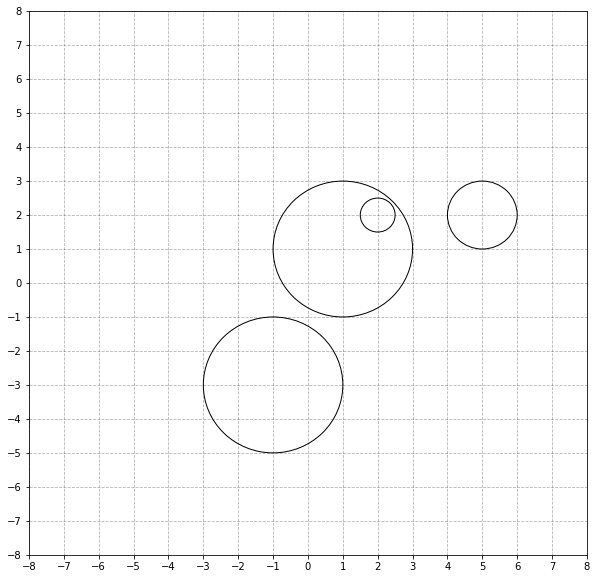

In [3]:
fig, ax = plt.subplots(figsize=(10,10))

for x,y,radius in circles:
    ax.add_artist(plt.Circle((x,y), radius, fill=False))

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.3)

plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()

In [4]:
min_x = max_x = min_y = max_y = None

for x,y,radius in circles:
    if min_x is None or x - radius < min_x:
        min_x = x - radius
        
    if min_y is None or y - radius < min_y:
        min_y = y - radius

    if max_x is None or x + radius > max_x:
        max_x = x + radius
        
    if max_y is None or y + radius > max_y:
        max_y = y + radius
    
rect_coords = [(min_x,min_y), (min_x,max_y),(max_x,max_y),(max_x,min_y)]

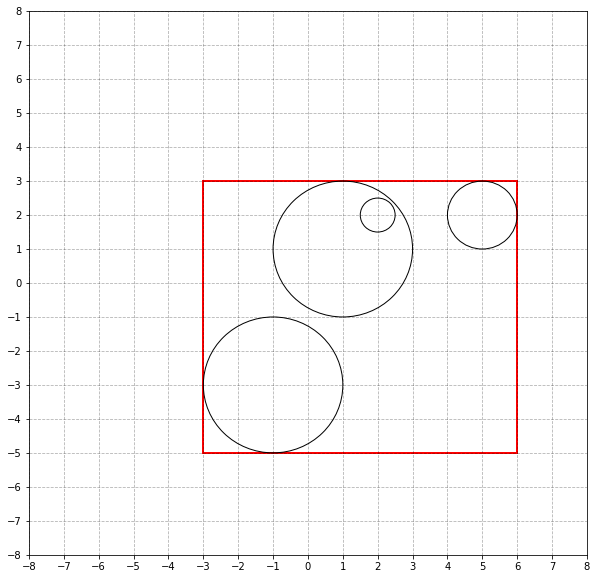

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

for x,y,radius in circles:
    ax.add_artist(plt.Circle((x,y), radius, fill=False))

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.3)

plt.xlim(-8,8)
plt.ylim(-8,8)

ax.add_patch(patches.Polygon(rect_coords, fill=False, color='r', linewidth=2))

plt.show()

In [6]:
print(rect_coords)

[(-3, -5), (-3, 3), (6, 3), (6, -5)]


# Bonus

In [7]:
vector = (1,1)

In [8]:
theta = atan(vector[0]/vector[1])

def rotate_coords(x,y, theta):
    return x*cos(theta) - y*sin(theta), x*sin(theta) + y*cos(theta)

In [9]:
min_x = max_x = min_y = max_y = None

for xo,yo,radius in circles:
    x,y = rotate_coords(xo,yo,theta)

    if min_x is None or x - radius < min_x:
        min_x = x - radius
        
    if min_y is None or y - radius < min_y:
        min_y = y - radius

    if max_x is None or x + radius > max_x:
        max_x = x + radius
        
    if max_y is None or y + radius > max_y:
        max_y = y + radius
    
rect_coords = [rotate_coords(min_x,min_y,-theta),
               rotate_coords(min_x,max_y,-theta),
               rotate_coords(max_x,max_y,-theta),
               rotate_coords(max_x,min_y,-theta)]

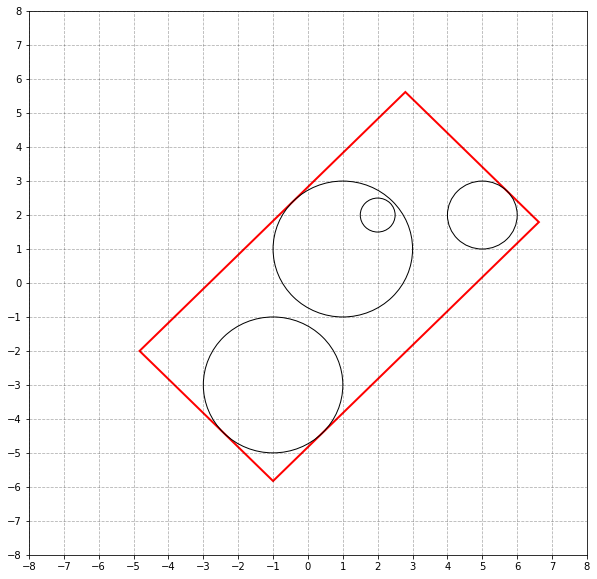

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

for x,y,radius in circles:
    ax.add_artist(plt.Circle((x,y), radius, fill=False))

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.3)

plt.xlim(-8,8)
plt.ylim(-8,8)

ax.add_patch(patches.Polygon(rect_coords, fill=False, color='r', linewidth=2))

plt.show()

In [11]:
print(rect_coords)

[(-4.82842712474619, -2.0), (2.792893218813452, 5.621320343559643), (6.621320343559642, 1.792893218813453), (-0.9999999999999996, -5.82842712474619)]
